# EJERCICIOS

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
from keras.activations import swish

2025-01-16 17:47:18.622140: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-16 17:47:18.629647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-16 17:47:18.639630: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-16 17:47:18.642384: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 17:47:18.650150: I tensorflow/core/platform/cpu_feature_guar

## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [2]:
datos = tf.keras.datasets.cifar10.load_data()

In [3]:
# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test_full, y_test_full) = datos

# 50,000 entrenamiento
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

# 5,000 validación
x_val = x_test_full[:5000]
y_val = y_test_full[:5000]

# 5,000 prueba
x_test = x_test_full[5000:10000]
y_test = y_test_full[5000:10000]


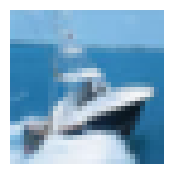

In [4]:
# muestra una imagen
plt.figure(figsize=(2, 2))
plt.imshow(x_train[8])
plt.axis('off')   # quita los ejes
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [5]:
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation=swish, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 
model.summary()

I0000 00:00:1737046041.289367   91823 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737046041.321243   91823 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737046041.321439   91823 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737046041.322829   91823 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [6]:
historial = {}
rangos = [1e-5, 5e-4 , 1e-4 , 5e-3 , 1e-3 , 5e-2 , 1e-2]

for lr in rangos:

    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
              metrics=['accuracy'])
    time_ini = time.time()
    hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
    time_fin = time.time()
    
    historial[lr] = {'Tasa aprendizaje': lr, 'Entrenamiento accuracy': hist.history['accuracy'][-1], 
                     'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': time_fin-time_ini}

Epoch 1/10


I0000 00:00:1737046044.914113   91901 service.cc:146] XLA service 0x7d4d08001ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737046044.914147   91901 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-16 17:47:25.042607: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-16 17:47:25.255556: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 107/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0971 - loss: 43.6134

I0000 00:00:1737046046.006278   91901 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1119 - loss: 13.6290 - val_accuracy: 0.1416 - val_loss: 2.9038
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1422 - loss: 2.6828 - val_accuracy: 0.1814 - val_loss: 2.3088
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1897 - loss: 2.2549 - val_accuracy: 0.2236 - val_loss: 2.1241
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2364 - loss: 2.0910 - val_accuracy: 0.2640 - val_loss: 2.0143
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2692 - loss: 1.9943 - val_accuracy: 0.2990 - val_loss: 1.9377
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2947 - loss: 1.9251 - val_accuracy: 0.3222 - val_loss: 1.8795
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3140 - loss: 1.8737 - val_accuracy: 0.3396 - val_loss: 1.8412
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3285 - loss: 1.8403 - val_accura

In [7]:
mejor_lr = 0
mejor_val_acc = -2
for k,value in historial.items(): 
    txt = ''
    for key in value.keys(): txt += str(key)+': '+str(value[key])+'    '
    print(txt)
    if mejor_val_acc < value['Validacion accuracy']:
        mejor_val_acc = value['Validacion accuracy']
        mejor_lr = k
print('Mejor lr: ',mejor_lr)

Tasa aprendizaje: 1e-05    Entrenamiento accuracy: 0.359279990196228    Validacion accuracy: 0.3723999857902527    Tiempo: 26.694779872894287    
Tasa aprendizaje: 0.0005    Entrenamiento accuracy: 0.39678001403808594    Validacion accuracy: 0.4041999876499176    Tiempo: 25.946476459503174    
Tasa aprendizaje: 0.0001    Entrenamiento accuracy: 0.447160005569458    Validacion accuracy: 0.44600000977516174    Tiempo: 26.679094791412354    
Tasa aprendizaje: 0.005    Entrenamiento accuracy: 0.0980599969625473    Validacion accuracy: 0.10140000283718109    Tiempo: 27.2749662399292    
Tasa aprendizaje: 0.001    Entrenamiento accuracy: 0.0997999981045723    Validacion accuracy: 0.0982000008225441    Tiempo: 27.435654878616333    
Tasa aprendizaje: 0.05    Entrenamiento accuracy: 0.09961999952793121    Validacion accuracy: 0.09939999878406525    Tiempo: 28.00967788696289    
Tasa aprendizaje: 0.01    Entrenamiento accuracy: 0.09855999797582626    Validacion accuracy: 0.10239999741315842    

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [8]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_6_D_checkpoints.weights.h5", save_weights_only=True)

hist = model.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), 
                     callbacks=[checkpoint_cb,early_stopping_cb])


model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
            optimizer=tf.keras.optimizers.Nadam(learning_rate=mejor_lr),   # asignar tasa de aprendizaje
            metrics=['accuracy'])

time_ini = time.time()
hist = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val))
time_fin = time.time()

mejor_ep = 0
mejor_ep_acc = 0
train_acc_arr = hist.history['accuracy']
for i in range(len(train_acc_arr)): 
    if train_acc_arr[i] > mejor_ep_acc: 
        mejor_ep = i
        mejor_ep_acc = train_acc_arr[i]

historial[mejor_lr] = ({'Tasa aprendizaje': mejor_lr, 'Entrenamiento accuracy': train_acc_arr[-1], 
                    'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': np.round(time_fin-time_ini), 'Mejor epoca': mejor_ep})

txt = ''
for key,value in historial[mejor_lr].items():  txt += str(key)+': '+str(value)+'\n'
print(txt)


Epoch 1/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1014 - loss: 2.3038 - val_accuracy: 0.0994 - val_loss: 2.3038
Epoch 2/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0986 - loss: 2.3041 - val_accuracy: 0.0976 - val_loss: 2.3038
Epoch 3/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0982 - loss: 2.3040 - val_accuracy: 0.0994 - val_loss: 2.3031
Epoch 4/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0994 - loss: 2.3042 - val_accuracy: 0.0990 - val_loss: 2.3043
Epoch 5/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1016 - loss: 2.3039 - val_accuracy: 0.0990 - val_loss: 2.3038
Epoch 6/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0982 - loss: 2.3041 - val_accuracy: 0.0982 - val_loss: 2.3039
Epoch 7/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0978 - loss: 2.3041 - val_accuracy: 0.1014 - val_loss: 2.3039
Epoch 1/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1011 - loss: 2.3030 - 

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [10]:
# Limpiamos memoria
tf.keras.backend.clear_session()

# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
model.add(tf.keras.layers.BatchNormalization())   # normalizacion
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation=swish, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 


def ej_CyD(model, letra):
    # C, hayar mejor lr
    historial = {}
    rangos = [1e-5, 5e-4 , 1e-4 , 5e-3 , 1e-3 , 5e-2 , 1e-2]
    for lr in rangos:

        model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
                metrics=['accuracy'])
        time_ini = time.time()
        hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
        time_fin = time.time()
        
        historial[lr] = {'Tasa aprendizaje': lr, 'Entrenamiento accuracy': hist.history['accuracy'][-1], 
                        'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': time_fin-time_ini}
        mejor_lr = 0
        mejor_val_acc = -2
        for k,value in historial.items(): 
            txt = ''
            for key in value.keys(): txt += str(key)+': '+str(value[key])+'    '
            print(txt)
            if mejor_val_acc < value['Validacion accuracy']:
                mejor_val_acc = value['Validacion accuracy']
                mejor_lr = k
        print('Mejor lr: ',mejor_lr,'\n\n')


    # D, aplicar detencion temprana con el mejor lr
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_6_"+letra+"_checkpoints.weights.h5", save_weights_only=True)

    hist = model.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), 
                        callbacks=[checkpoint_cb,early_stopping_cb])


    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Nadam(learning_rate=mejor_lr),   # asignar tasa de aprendizaje
                metrics=['accuracy'])

    time_ini = time.time()
    hist = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val))
    time_fin = time.time()

    mejor_ep = 0
    mejor_ep_acc = 0
    train_acc_arr = hist.history['accuracy']
    for i in range(len(train_acc_arr)): 
        if train_acc_arr[i] > mejor_ep_acc: 
            mejor_ep = i
            mejor_ep_acc = train_acc_arr[i]

    historial[mejor_lr] = ({'Tasa aprendizaje': mejor_lr, 'Entrenamiento accuracy': train_acc_arr[-1], 
                        'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': np.round(time_fin-time_ini), 'Mejor epoca': mejor_ep})

    txt = '\n'
    for key,value in historial[mejor_lr].items():  txt += str(key)+': '+str(value)+'\n'
    print(txt)
    return mejor_lr, historial


mejor_lr_E, historial_E = ej_CyD(model,'E')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1407 - loss: 2.2649 - val_accuracy: 0.2302 - val_loss: 2.1201
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2419 - loss: 2.0977 - val_accuracy: 0.2826 - val_loss: 2.0222
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2671 - loss: 2.0162 - val_accuracy: 0.2950 - val_loss: 1.9476
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2829 - loss: 1.9431 - val_accuracy: 0.3072 - val_loss: 1.8614
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3029 - loss: 1.8573 - val_accuracy: 0.3316 - val_loss: 1.7944
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3294 - loss: 1.7935 - val_accuracy: 0.3530 - val_loss: 1.7468
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3488 - loss: 1.7525 - val_accuracy: 0.3674 - val_loss: 1.7126
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3677 - loss: 1.7143 - 

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [11]:
# Limpiamos memoria
tf.keras.backend.clear_session()

# estandarizar
media = np.mean(x_train, axis=(0, 1, 2))
desviacion = np.std(x_train, axis=(0, 1, 2))
x_train = (x_train - media) / desviacion
x_val = (x_val - media) / desviacion
x_test = (x_test - media) / desviacion


# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer=tf.keras.initializers.LecunNormal))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 

mejor_lr_F, historial_F = ej_CyD(model,'F')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2256 - loss: 2.2520 - val_accuracy: 0.3362 - val_loss: 1.8619
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3513 - loss: 1.8172 - val_accuracy: 0.3750 - val_loss: 1.7478
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3903 - loss: 1.7106 - val_accuracy: 0.4022 - val_loss: 1.6895
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4137 - loss: 1.6425 - val_accuracy: 0.4160 - val_loss: 1.6477
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4392 - loss: 1.5930 - val_accuracy: 0.4270 - val_loss: 1.6140
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4523 - loss: 1.5490 - val_accuracy: 0.4358 - val_loss: 1.5977
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4682 - loss: 1.5119 - val_accuracy: 0.4312 - val_loss: 1.5849
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4741 - loss: 1.4831 - 

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [12]:
# con la estandarizacion de F es suficiente, no es necesario estandarizar de nuevo

# Limpiamos memoria
tf.keras.backend.clear_session()


# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer=tf.keras.initializers.LecunNormal))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dropout(0.2))     # capa dropout ('apaga' un porcentaje de neuronas al azar)
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 

mejor_lr_G, historial_G = ej_CyD(model,'G')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1920 - loss: 2.4504 - val_accuracy: 0.3278 - val_loss: 1.9106
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3014 - loss: 1.9857 - val_accuracy: 0.3676 - val_loss: 1.7882
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3414 - loss: 1.8611 - val_accuracy: 0.3948 - val_loss: 1.7192
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3699 - loss: 1.7832 - val_accuracy: 0.4162 - val_loss: 1.6785
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3948 - loss: 1.7076 - val_accuracy: 0.4288 - val_loss: 1.6381
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4129 - loss: 1.6575 - val_accuracy: 0.4336 - val_loss: 1.6074
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4310 - loss: 1.6042 - val_accuracy: 0.4418 - val_loss: 1.6007
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4411 - loss: 1.5720 - 